### Max speedup / scalability vs task size

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# load task_size vs sequential_time 
task_size_vs_tseq_df = pd.read_csv('../Statistics/task_size_vs_sequential_time.csv')

task_sizes = task_size_vs_tseq_df['task_size']
sequential_times = task_size_vs_tseq_df['sequential_time']

task_size_vs_tseq_df.head()

,task_size,sequential_time
0,125,125374
1,250,250352
2,500,500528
3,1000,1000418
4,2000,2000686


In [10]:
# load completion_time vs nw for each task size
tc_vs_nw_df_list = []
for task_size in task_sizes:
    df = pd.read_csv('../Statistics/TaskSize/completion_time_vs_nw_task_size_' + 
                     str(task_size) + '.csv')
    tc_vs_nw_df_list.append(df)

nw = tc_vs_nw_df_list[0]['nw']
tc_vs_nw_df_list[0].head()

,nw,completion_time
0,1,159311
1,2,85679
2,3,57393
3,4,45117
4,5,37704


In [11]:
max_speedups = []
nw_max_speedups = []
max_scalabilities = []

speedups_list = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = tc_vs_nw_df_list[i]['completion_time']
    
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    nw_max_speedups.append(np.argmax(speedup)+1)
    max_scalabilities.append(np.max(scalability))
    
    speedups_list.append(speedup)

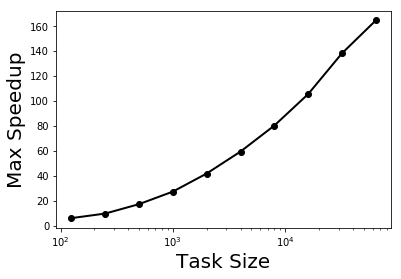

In [12]:
plt.plot(task_sizes, max_speedups, 'o-', color='black', label='max speedup', linewidth=2)
#plt.plot(task_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Max Speedup', fontsize=20)
plt.xlabel('Task Size', fontsize=20)
#plt.title('Max Speedup vs Task Size')
plt.show()

In [19]:
print('max speedup', round(max(max_speedups),2))
print('at task size', task_sizes[np.argmax(max_speedups)])

max speedup 164.77
at task size 64000


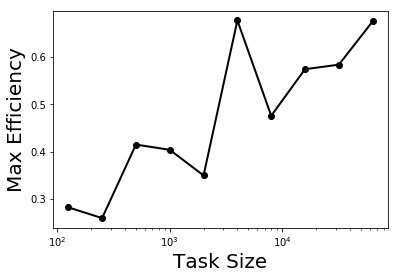

In [13]:
# max efficiency
max_efficiencies = [ float(sp)/nw for nw, sp in zip(nw_max_speedups, max_speedups)]
plt.plot(task_sizes, max_efficiencies, '-o', color='black', linewidth=2)
plt.ylabel('Max Efficiency', fontsize=20)
plt.xlabel('Task Size', fontsize=20)
#plt.title('Max Efficiency vs Task Size')
plt.xscale('log')
plt.show()

In [20]:
print('max efficiency', round(max(max_efficiencies),2))
print('at task size', task_sizes[np.argmax(max_efficiencies)])

max efficiency 0.68
at task size 4000


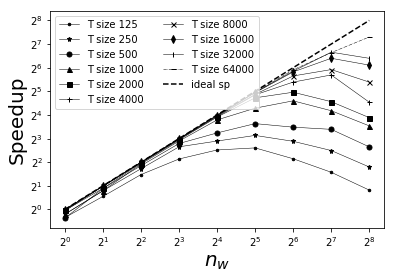

In [38]:
index = list(np.array([1,2,4,8,16,32,64,128,256]) - 1)
# all speedups for each task size vs nw
linestyles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-.']
markers = ['.', '*', 'o','^', 's', '+', 'x', 'd', '|', '_']

for task_size, sp, ls, ms in zip(task_sizes, speedups_list, linestyles, markers):
    nw = np.array(index)+1
    sp = [sp[i] for i in index]
    plt.plot(nw, sp, label='T size ' + str(task_size), 
             linestyle=ls, marker=ms, color='black', linewidth=0.5, markersize=5)

plt.plot(nw, nw, label='ideal sp', linestyle='--', color='k')

plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.legend(loc='upper left', ncol=2, fancybox=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.show()